# Chapter 3

In [6]:
remotes::install_github("bnicenboim/bcogsci")

rbibutils (2.2.7 -> 2.2.9) [CRAN]
Rdpack    (2.2   -> 2.4  ) [CRAN]


Installing 2 packages: rbibutils, Rdpack




The downloaded binary packages are in
	/var/folders/bx/vr1n7w6x7053h6fbl2jrprwm0000gn/T//Rtmp29OFpE/downloaded_packages
✔  checking for file ‘/private/var/folders/bx/vr1n7w6x7053h6fbl2jrprwm0000gn/T/Rtmp29OFpE/remotes45eccd22d82/bnicenboim-bcogsci-8e4b99b/DESCRIPTION’ (415ms)
─  preparing ‘bcogsci’: (499ms)
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
   Loading required namespace: bcogsci
─  saving partial Rd database (3.4s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
     NB: this package now depends on R (>= 3.5.0)
     serialize/load version 3 cannot be read in older versions of R.
     File(s) containing such objects:
       ‘bcogsci/data/df_VMJG18E1.rda’ ‘bcogsci/data/df_VMJG18E2.rda’
       ‘bcogsci/data/df_VMJG18E3.rda’ ‘bcogsci/data/df_VMJG18E4.rda’
       ‘bcogsci/data/df_VMJG18E5.rda’ ‘bcogsci/data/df_VMJG18E6.rda’
       ‘bcogsci/data/df_VMJG18E7.rda’ ‘b

In [7]:
install.packages(c("MASS", "dplyr", "tidyr", "purrr", "extraDistr", "ggplot2", "loo", "bridgesampling", "brms", "bayesplot", "tictoc", "hypr", "bcogsci", "SIN", "papaja", "grid", "kableExtra", "gridExtra", "lme4", "cowplot", "pdftools", "cmdstanr"))

Warning message:
“package ‘grid’ is a base package, and should not be updated”
Warning message:
“packages ‘bcogsci’, ‘SIN’, ‘cmdstanr’ are not available for this version of R

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘glue’, ‘numDeriv’, ‘evaluate’, ‘cli’, ‘tensorA’, ‘distributional’, ‘globals’, ‘listenv’, ‘parallelly’, ‘knitr’, ‘rmarkdown’, ‘xfun’, ‘rlang’, ‘vctrs’, ‘Brobdingnag’, ‘posterior’, ‘future’, ‘nleqslv’, ‘abind’, ‘pracma’, ‘tinylabels’, ‘bookdown’, ‘rmdfiltr’, ‘webshot’, ‘svglite’, ‘qpdf’





The downloaded binary packages are in
	/var/folders/bx/vr1n7w6x7053h6fbl2jrprwm0000gn/T//Rtmp29OFpE/downloaded_packages


In [1]:
mean = 3
sd = 1
n = 1000

data_rt = rnorm(n, mean,sd)

In [2]:
y = lm(data_rt ~ 1)

-----

In [2]:
library(MASS)

## be careful to load dplyr after MASS
library(dplyr)
library(tidyr)
library(purrr)
library(extraDistr)
library(ggplot2)
library(loo)
library(bridgesampling)
library(brms)
library(bayesplot)
library(tictoc)
library(hypr)
library(bcogsci)
library(lme4)
library(rstan)
library(cmdstanr)
library(rootSolve)

Warning message:
“package ‘MASS’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘purrr’ was built under R version 4.1.2”

Attaching package: ‘extraDistr’


The following object is masked from ‘package:purrr’:

    rdunif


Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”
Warning message:
“package ‘loo’ was built under R version 4.1.2”
This is loo version 2.5.1

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) fo

ERROR: Error in library(cmdstanr): there is no package called ‘cmdstanr’


In [4]:
## Save compiled models:
rstan_options(auto_write = FALSE)
## Parallelize the chains using all the cores:
options(mc.cores = parallel::detectCores())
# To solve some conflicts between packages
# select <- dplyr::select
# extract <- rstan::extract

In [5]:
data("df_spacebar")

head(df_spacebar)

rt,trial
<int>,<int>
141,1
138,2
128,3
132,4
126,5
134,6


In [4]:
d <- density(df_spacebar$rt)

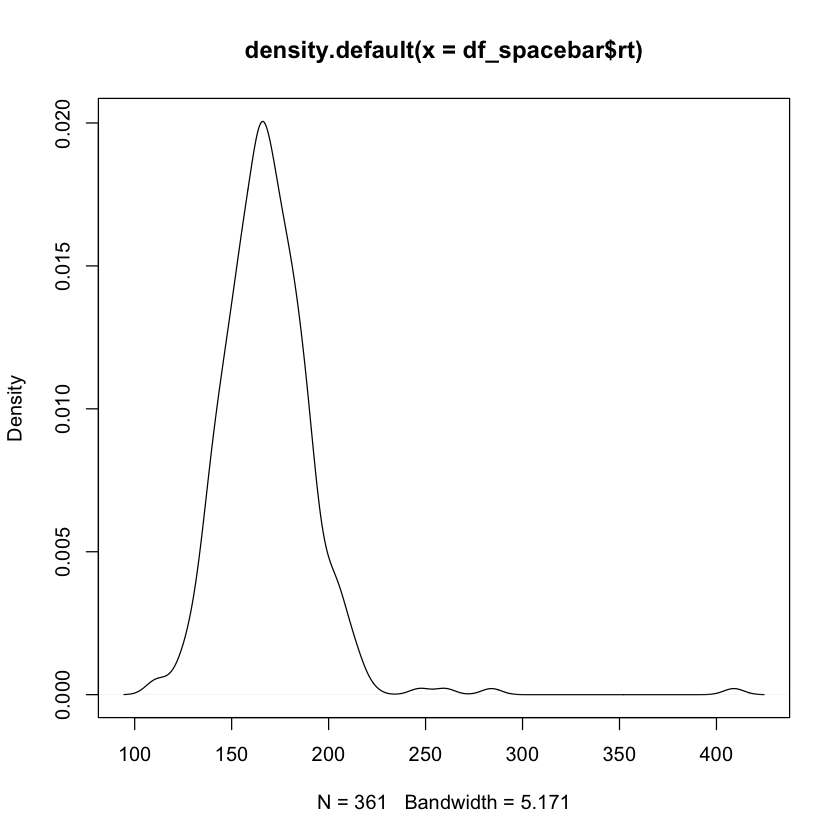

In [5]:
plot(d)

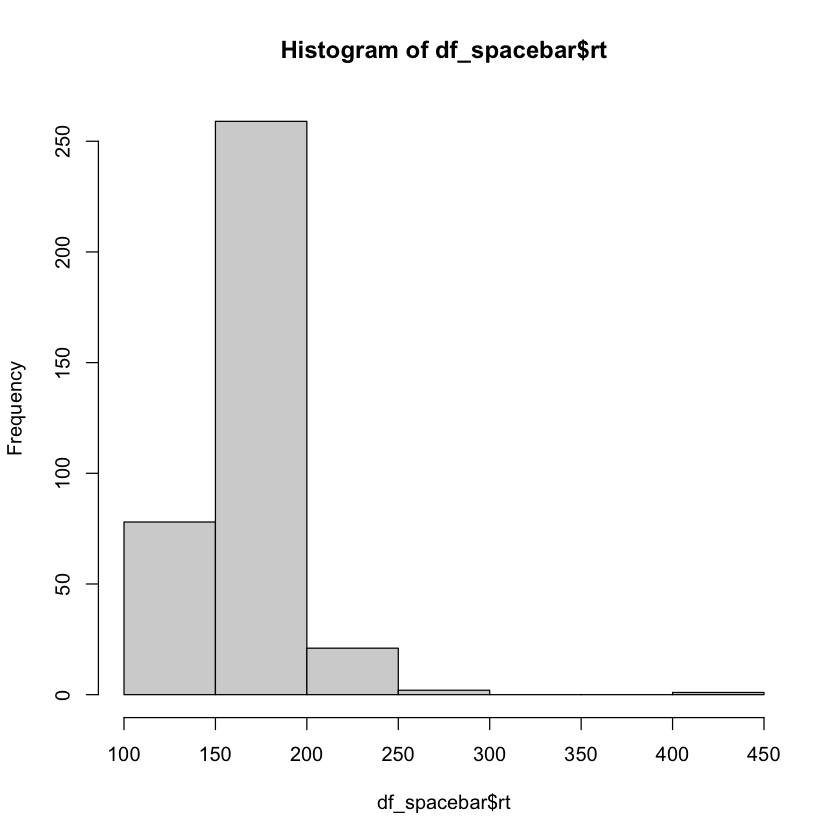

In [6]:
hist(df_spacebar$rt)

### BRM model

1. The term family = gaussian() makes it explicit that the underlying likelihood function is a normal distribution (Gaussian and normal are synonyms). This detail is implicit in lm. Other linking functions are possible, exactly as in the glm function. The default for brms that corresponds to the lm function is gaussian().
2. The term prior takes as argument a vector of priors. Although this specification of priors is optional, the researcher should always explicitly specify each prior. Otherwise, brms will define priors by default, which may or may not be appropriate for the research area.
3. The term chains refers to the number of independent runs for sampling (by default four).
4. The term iter refers to the number of iterations that the sampler makes to sample from the posterior distribution of each parameter (by default 2000).
5. The term warmup refers to the number of iterations from the start of sampling that are eventually discarded (by default half of iter).

In [3]:
# model with brms

fit_press <- brm(rt ~ 1,
  data = df_spacebar,
  family = gaussian(),
  prior = c(
    prior(uniform(0, 60000), class = Intercept),
    prior(uniform(0, 2000), class = sigma)
  ),
  chains = 4,
  iter = 2000,
  warmup = 1000
)  

Warning message:
“It appears as if you have specified a lower bounded prior on a parameter that has no natural lower bound.
If this is really what you want, please specify argument 'lb' of 'set_prior' appropriately.
Warning occurred for prior 
Intercept ~ uniform(0, 60000)
”
Warning message:
“It appears as if you have specified an upper bounded prior on a parameter that has no natural upper bound.
If this is really what you want, please specify argument 'ub' of 'set_prior' appropriately.
Warning occurred for prior 
Intercept ~ uniform(0, 60000)
<lower=0> sigma ~ uniform(0, 2000)
”
Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '2e114c680467eb25bbc351b42ed0eade' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Log probability evaluates to log(0), i.e. negative infinity.
Chain 1:   Stan can't start sampling from this initial value.
Chain 1: 
Chain 1: Gradient evaluation took 2.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampli

In [4]:
# posterior_summary(fit_press)

fit_press

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   168.64      1.30   166.02   171.17 1.00     4197     2806

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    25.01      0.92    23.28    26.87 1.00     3784     2873

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [14]:
head(as_draws_df(fit_press) )

b_Intercept,sigma,lprior,lp__,.chain,.iteration,.draw
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
166.5930,24.08488,-18.603,-1689.586,1,1,1
165.5623,23.62954,-18.603,-1691.966,1,2,2
167.5571,27.40068,-18.603,-1691.211,1,3,3
170.7572,24.41648,-18.603,-1689.367,1,4,4
166.1738,25.00214,-18.603,-1689.624,1,5,5
167.6159,25.09091,-18.603,-1688.182,1,6,6


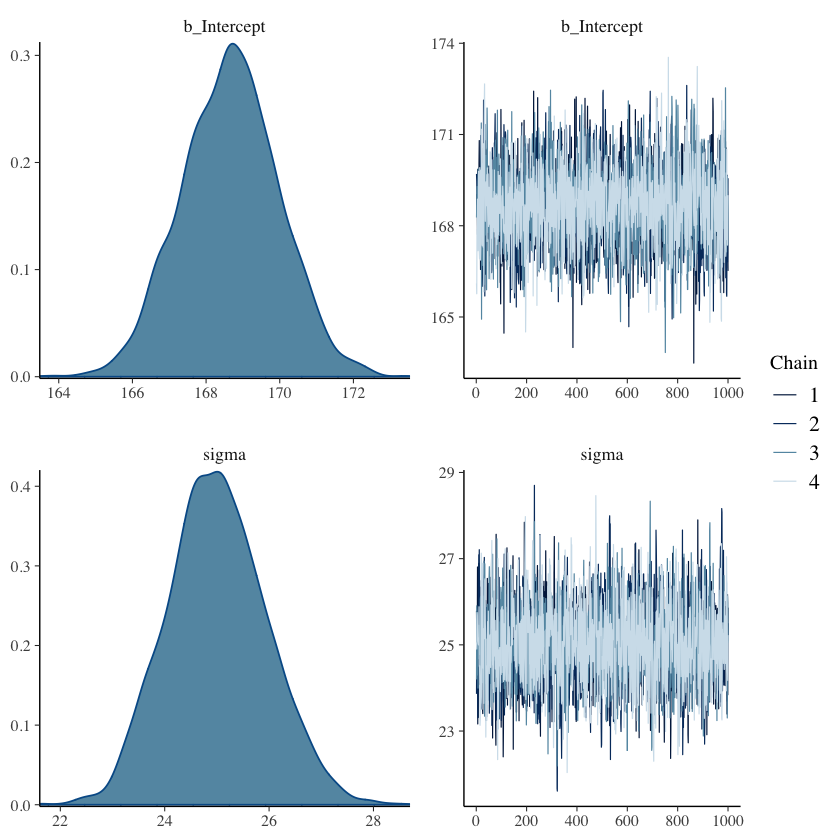

In [9]:
plot(fit_press)

In [16]:
# get mean 
as_draws_df(fit_press)$b_Intercept %>% mean()

[1] 168.659

In [17]:
# get 95% CI
as_draws_df(fit_press)$b_Intercept %>% 
  quantile(c(0.025, .975))

2.5%    97.5% 
166.1242 171.2756

**We should ask ourselves the following questions:**

1. What information are the priors encoding? Do the priors make sense?
2. Does the likelihood assumed in the model make sense for the data?

## Prior predictive distribution

In [10]:
normal_predictive_distribution <- 
  function(mu_samples, sigma_samples, N_obs) {
  # empty data frame with headers:
  df_pred <- tibble(
    trialn = numeric(0),
    rt_pred = numeric(0),
    iter = numeric(0)
  )

  for (i in seq_along(mu_samples)) {
    mu <- mu_samples[i]
    sigma <- sigma_samples[i]
      
    df_pred <- bind_rows(
      df_pred,
      tibble(
        trialn = seq_len(N_obs), # 1, 2,... N_obs
        rt_pred = rnorm(N_obs, mu, sigma),
        iter = i
      )
    )
  }
  df_pred
}

---

In [31]:
N_samples <- 1000
N_obs <- nrow(df_spacebar)

# generate randomly 1000 samples of means between 0 and 60000 (as in above defined  priors)
mu_samples <- runif(N_samples, 0, 60000)

# generate randomly 1000 samples of stds between 0 and 2000 (as in above defined  priors)
sigma_samples <- runif(N_samples, 0, 2000)

prior_pred <- normal_predictive_distribution(
  mu_samples = mu_samples,
  sigma_samples = sigma_samples,
  N_obs = N_obs
)

In [ ]:
prior_pred

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



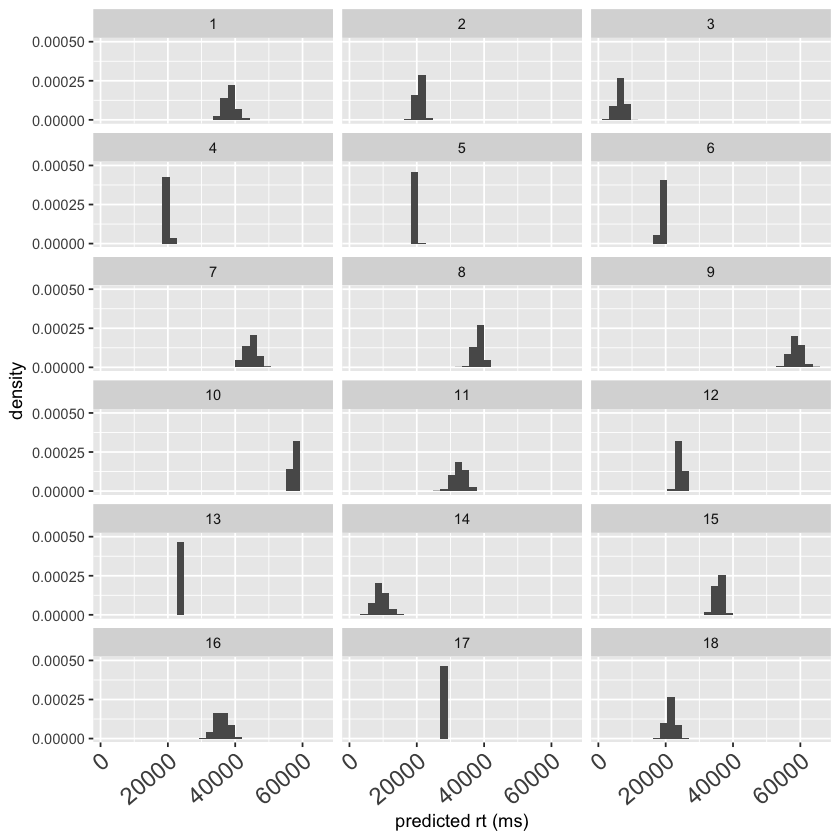

In [35]:
prior_pred %>%
  filter(iter <= 18) %>%
  ggplot(aes(rt_pred)) +
  geom_histogram(aes(y=..density..)) +
  xlab("predicted rt (ms)")+
  theme(axis.text.x = element_text(angle=40,vjust=1,hjust=1,size=14))+
  scale_y_continuous(limits=c(0, 0.0005),
                     breaks= c(0, 0.00025,0.0005),     name="density")+
  facet_wrap(~iter, ncol = 3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



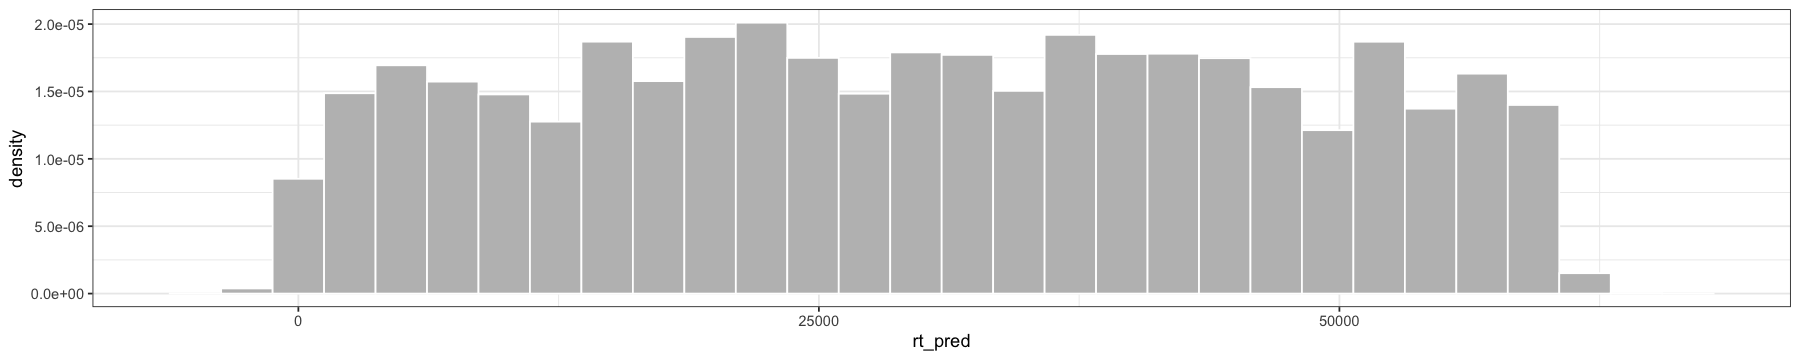

In [46]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=3)

prior_pred %>% 
    ggplot(aes(rt_pred)) +
    theme_bw() +
    geom_histogram(aes(y=..density..), color="white", fill="grey")

## Button-pressing example with different priors

### Uniform priors

In [7]:
# We fit the model with the default setting of the sampler:
# 4 chains, 2000 iterations with half of them as warmup.

fit_press_unif <- brm(rt ~ 1,
  data = df_spacebar,
  family = gaussian(),
  prior = c(
    prior(uniform(-10^10, 10^10), class = Intercept),
    prior(uniform(0, 10^10), class = sigma)
  )
)

Warning message:
“It appears as if you have specified a lower bounded prior on a parameter that has no natural lower bound.
If this is really what you want, please specify argument 'lb' of 'set_prior' appropriately.
Warning occurred for prior 
Intercept ~ uniform(-10^10, 10^10)
”
Warning message:
“It appears as if you have specified an upper bounded prior on a parameter that has no natural upper bound.
If this is really what you want, please specify argument 'ub' of 'set_prior' appropriately.
Warning occurred for prior 
Intercept ~ uniform(-10^10, 10^10)
<lower=0> sigma ~ uniform(0, 10^10)
”
Compiling Stan program...

Start sampling



In [8]:
fit_press_unif

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   168.64      1.34   165.98   171.23 1.00     3721     2920

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    25.02      0.95    23.28    26.97 1.00     3958     2734

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

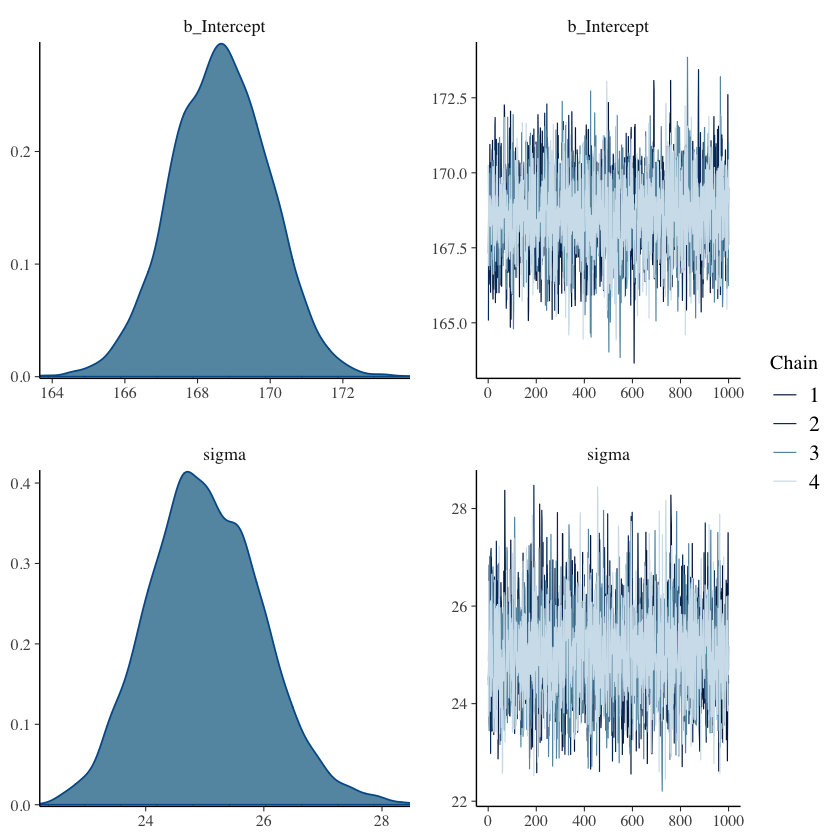

In [9]:
plot(fit_press_unif)

In [18]:
density_fit_press_mean = density(as.data.frame(fit_press)$b_Intercept)
density_fit_press_sd = density(as.data.frame(fit_press)$sigma)
density_fit_press_uni_mean = density(as.data.frame(fit_press_unif)$b_Intercept)
density_fit_press_uni_sd = density(as.data.frame(fit_press_unif)$sigma)

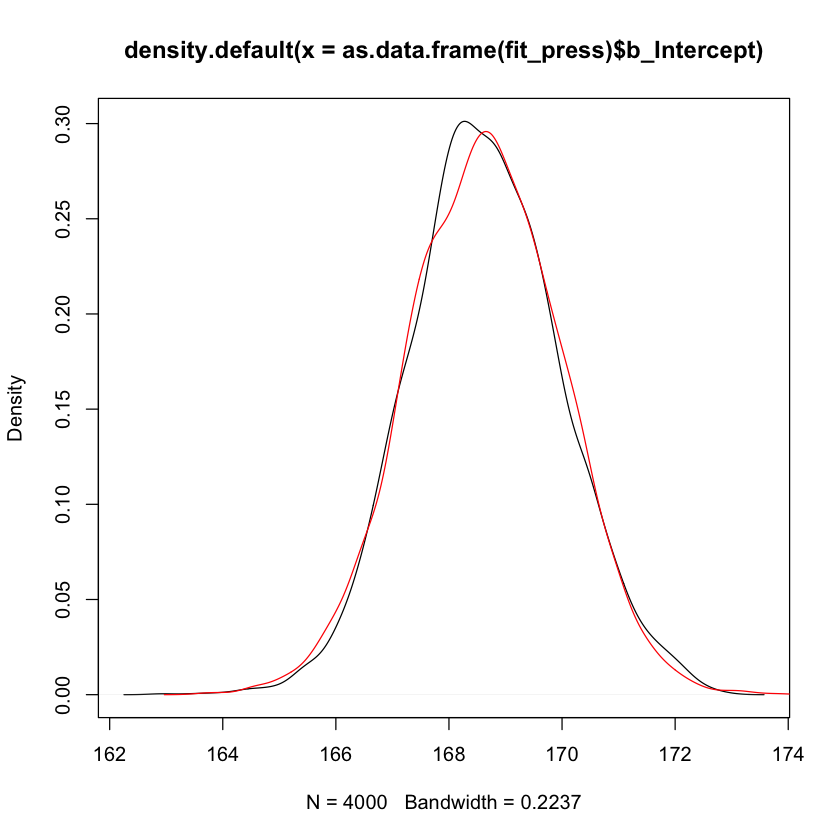

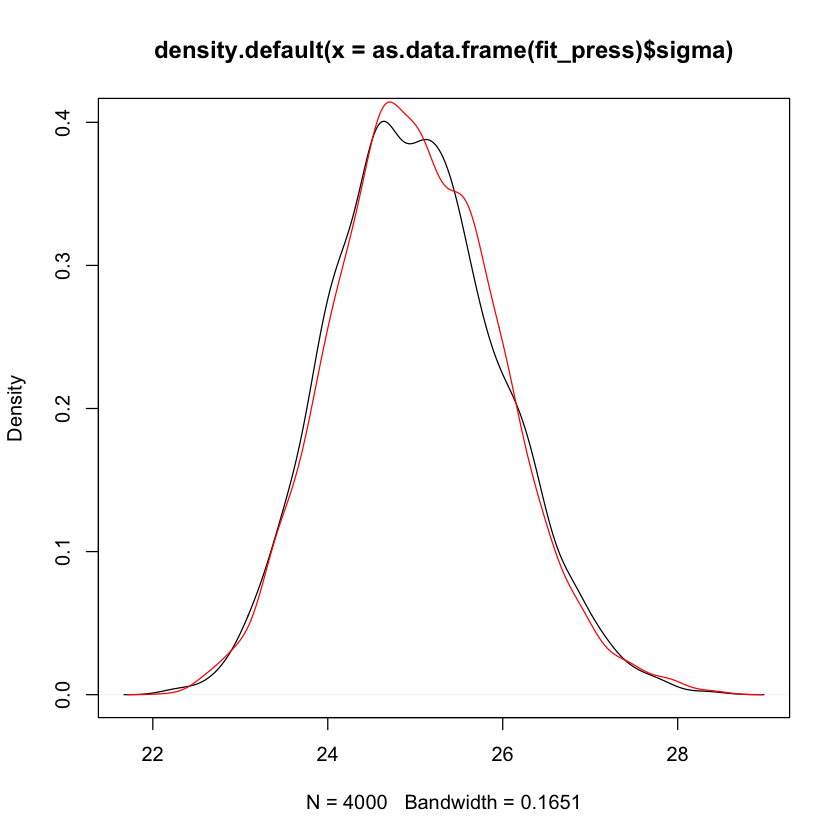

In [22]:
plot(density_fit_press_mean)
lines(density_fit_press_uni_mean, col="red")

plot(density_fit_press_sd)
lines(density_fit_press_uni_sd, col="red")

### Informative priors

In [24]:
fit_press_inf <- brm(rt ~ 1,
  data = df_spacebar,
  family = gaussian(),
  prior = c(
    prior(normal(400, 10), class = Intercept),
    # brms knows that SDs need to be bounded 
    # to exclude values below zero:
    prior(normal(100, 10), class = sigma)
  )
)

Compiling Stan program...

Start sampling



In [25]:
fit_press_inf

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   172.88      1.40   170.16   175.72 1.00     2540     2055

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    26.05      1.03    24.15    28.20 1.00     3440     2938

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [26]:
density_fit_press_inf_mean = density(as.data.frame(fit_press_inf)$b_Intercept)
density_fit_press_inf_sd = density(as.data.frame(fit_press_inf)$sigma)

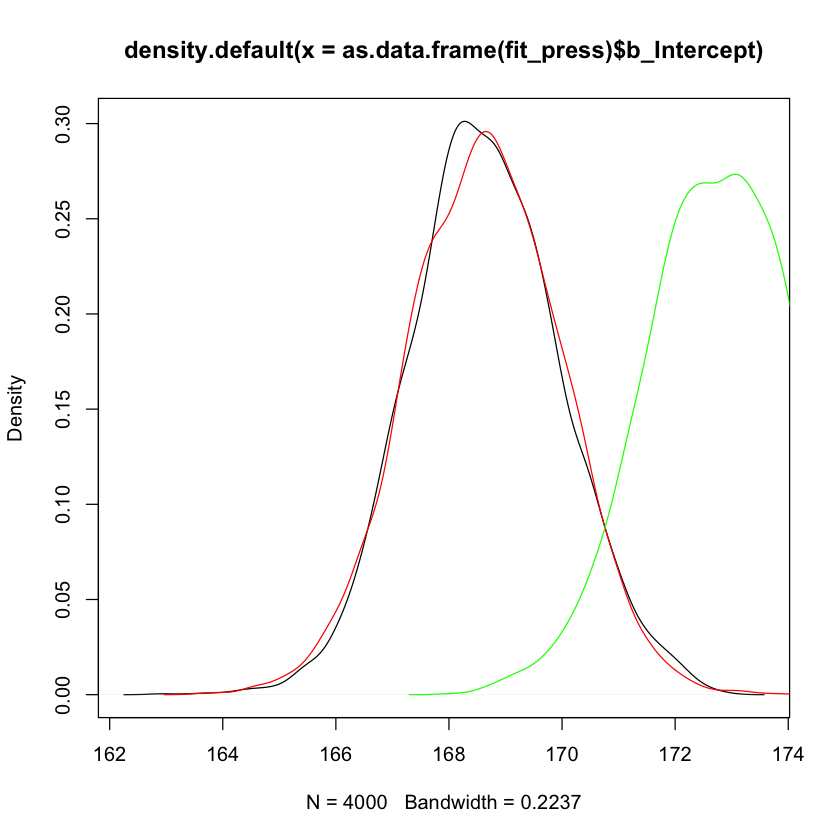

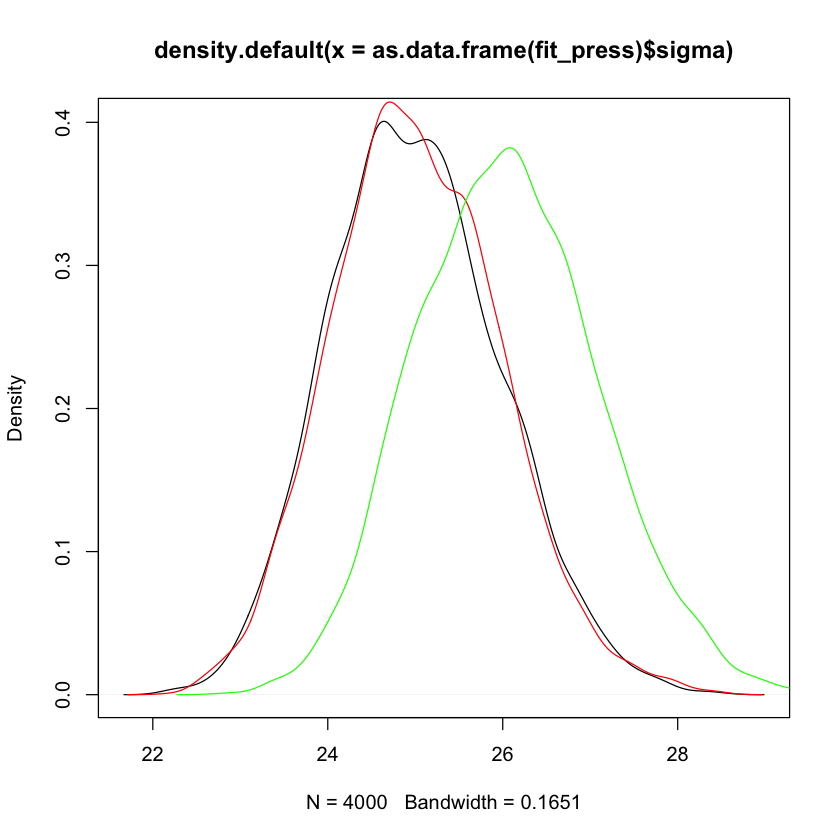

In [27]:
plot(density_fit_press_mean)
lines(density_fit_press_uni_mean, col="red")
lines(density_fit_press_inf_mean, col="green")


plot(density_fit_press_sd)
lines(density_fit_press_uni_sd, col="red")
lines(density_fit_press_inf_sd, col="green")

### Principled priors

In [28]:
fit_press_reg <- brm(rt ~ 1,
  data = df_spacebar,
  family = gaussian(),
  prior = c(
    prior(normal(200, 100), class = Intercept),
    prior(normal(50, 50), class = sigma)
  )
)

Compiling Stan program...

Start sampling



In [29]:
fit_press_reg

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   168.63      1.31   166.11   171.19 1.00     4050     2829

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    25.01      0.94    23.19    26.90 1.00     3481     2440

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [30]:
density_fit_press_reg_mean = density(as.data.frame(fit_press_reg)$b_Intercept)
density_fit_press_reg_sd = density(as.data.frame(fit_press_reg)$sigma)

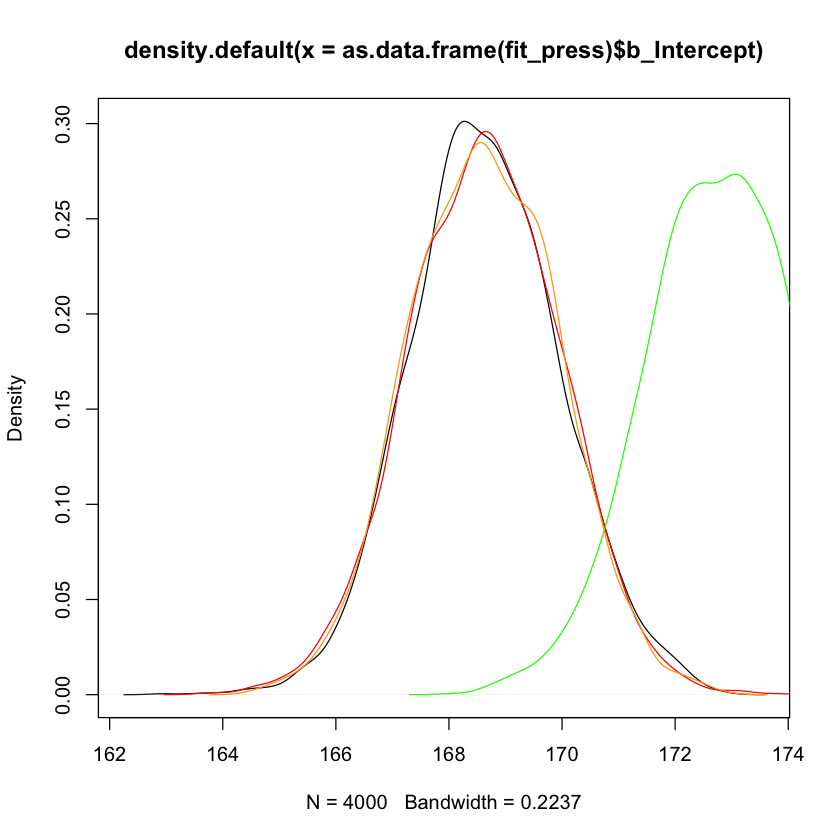

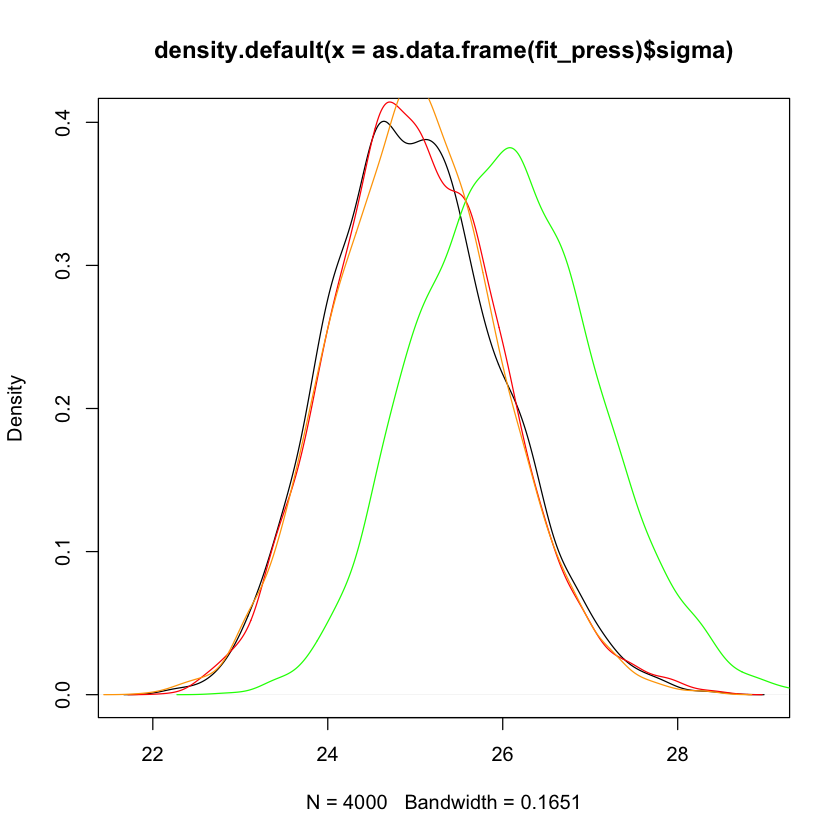

In [31]:
plot(density_fit_press_mean)
lines(density_fit_press_uni_mean, col="red")
lines(density_fit_press_inf_mean, col="green")
lines(density_fit_press_reg_mean, col="orange")



plot(density_fit_press_sd)
lines(density_fit_press_uni_sd, col="red")
lines(density_fit_press_inf_sd, col="green")
lines(density_fit_press_reg_sd, col="orange")

## Posterior predictive distribution

In [19]:
# drawing samples form posterior (after model fitting)

N_obs <- nrow(df_spacebar)
mu_samples <- as_draws_df(fit_press)$b_Intercept
sigma_samples <- as_draws_df(fit_press)$sigma

posterior_pred = normal_predictive_distribution(
  mu_samples = mu_samples,
  sigma_samples = sigma_samples,
  N_obs = N_obs
)

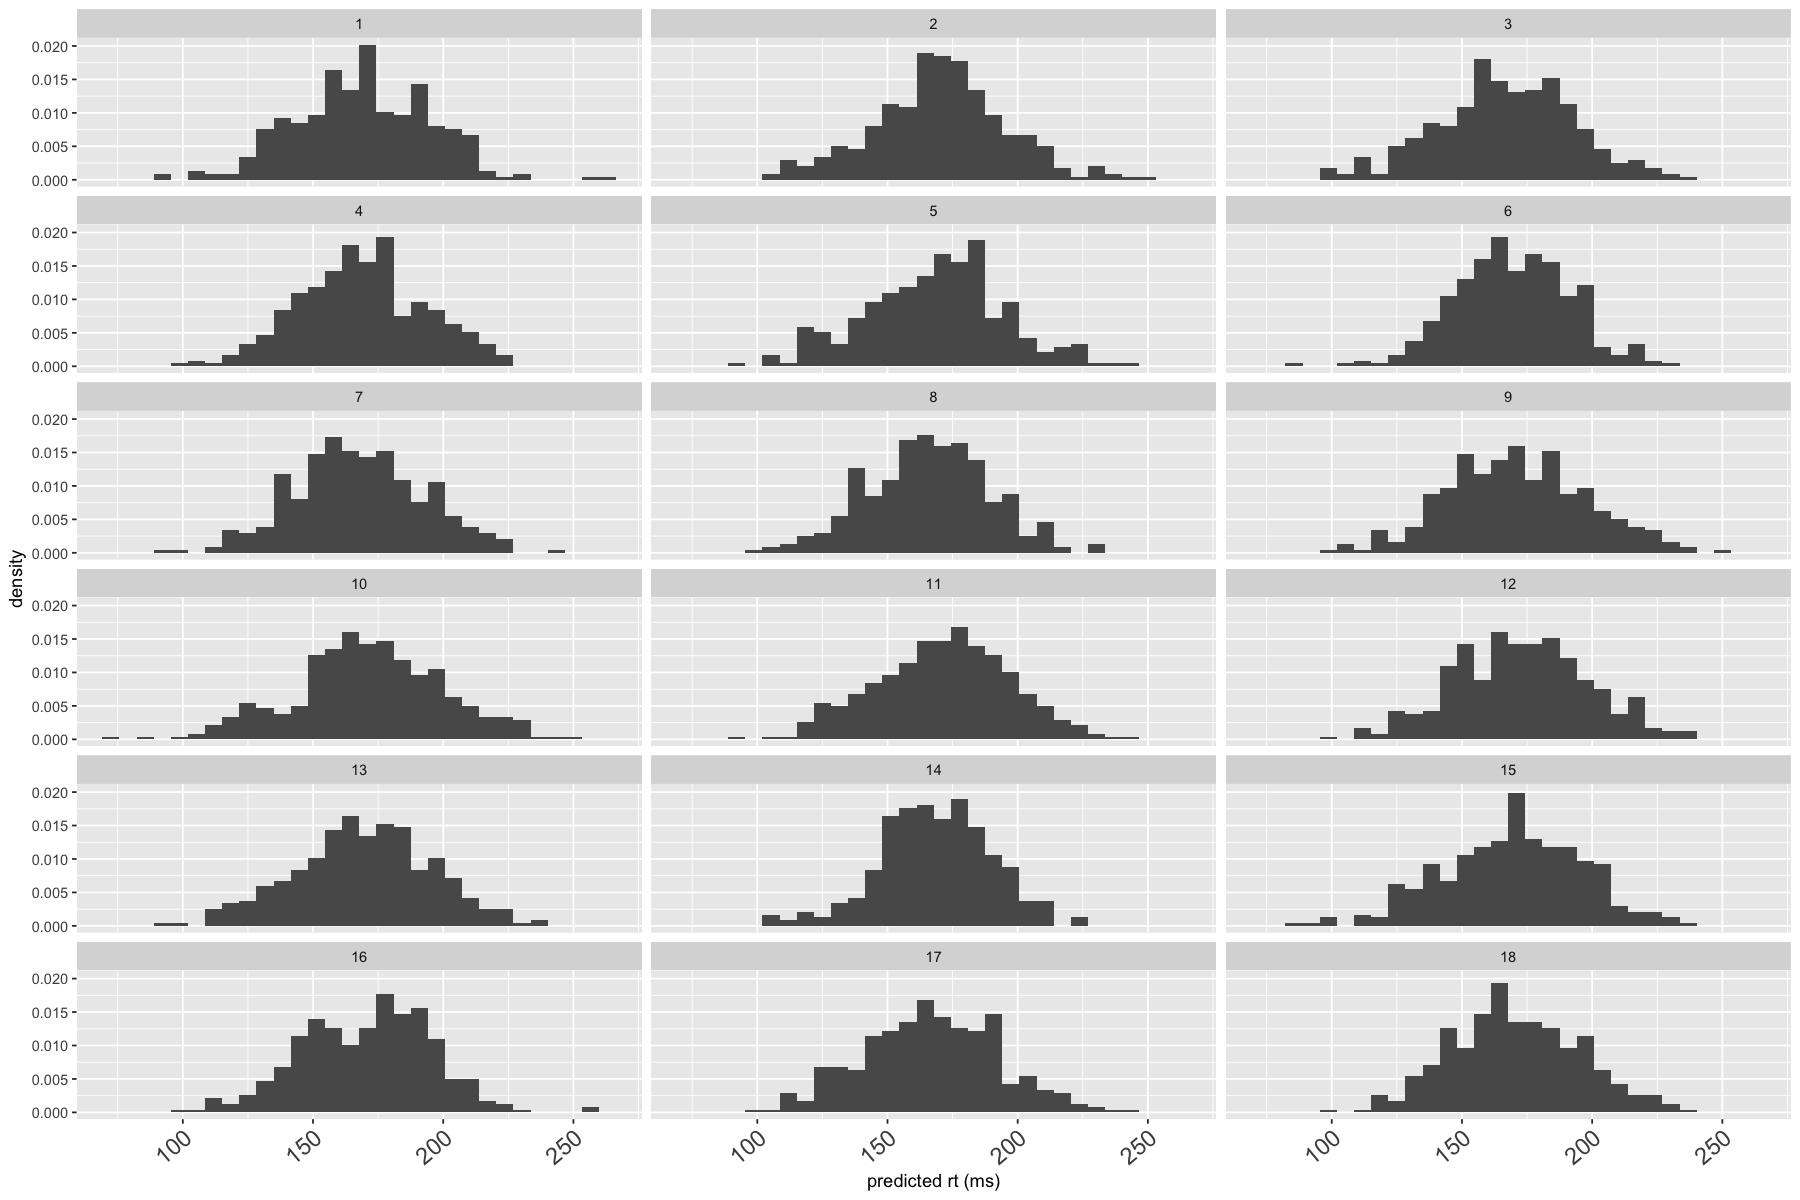

In [40]:
options(repr.plot.width=15, repr.plot.height=10)

posterior_pred %>%
  filter(iter <= 18) %>%
  ggplot(aes(rt_pred)) +
  geom_histogram(aes(y=..density..), bins = 30) + 
  xlab("predicted rt (ms)")+
  theme(axis.text.x = element_text(angle=40,vjust=1,hjust=1,size=14))+
  facet_wrap(~iter, ncol = 3)

In [14]:
posterior_pred_2 = posterior_predict(fit_press)

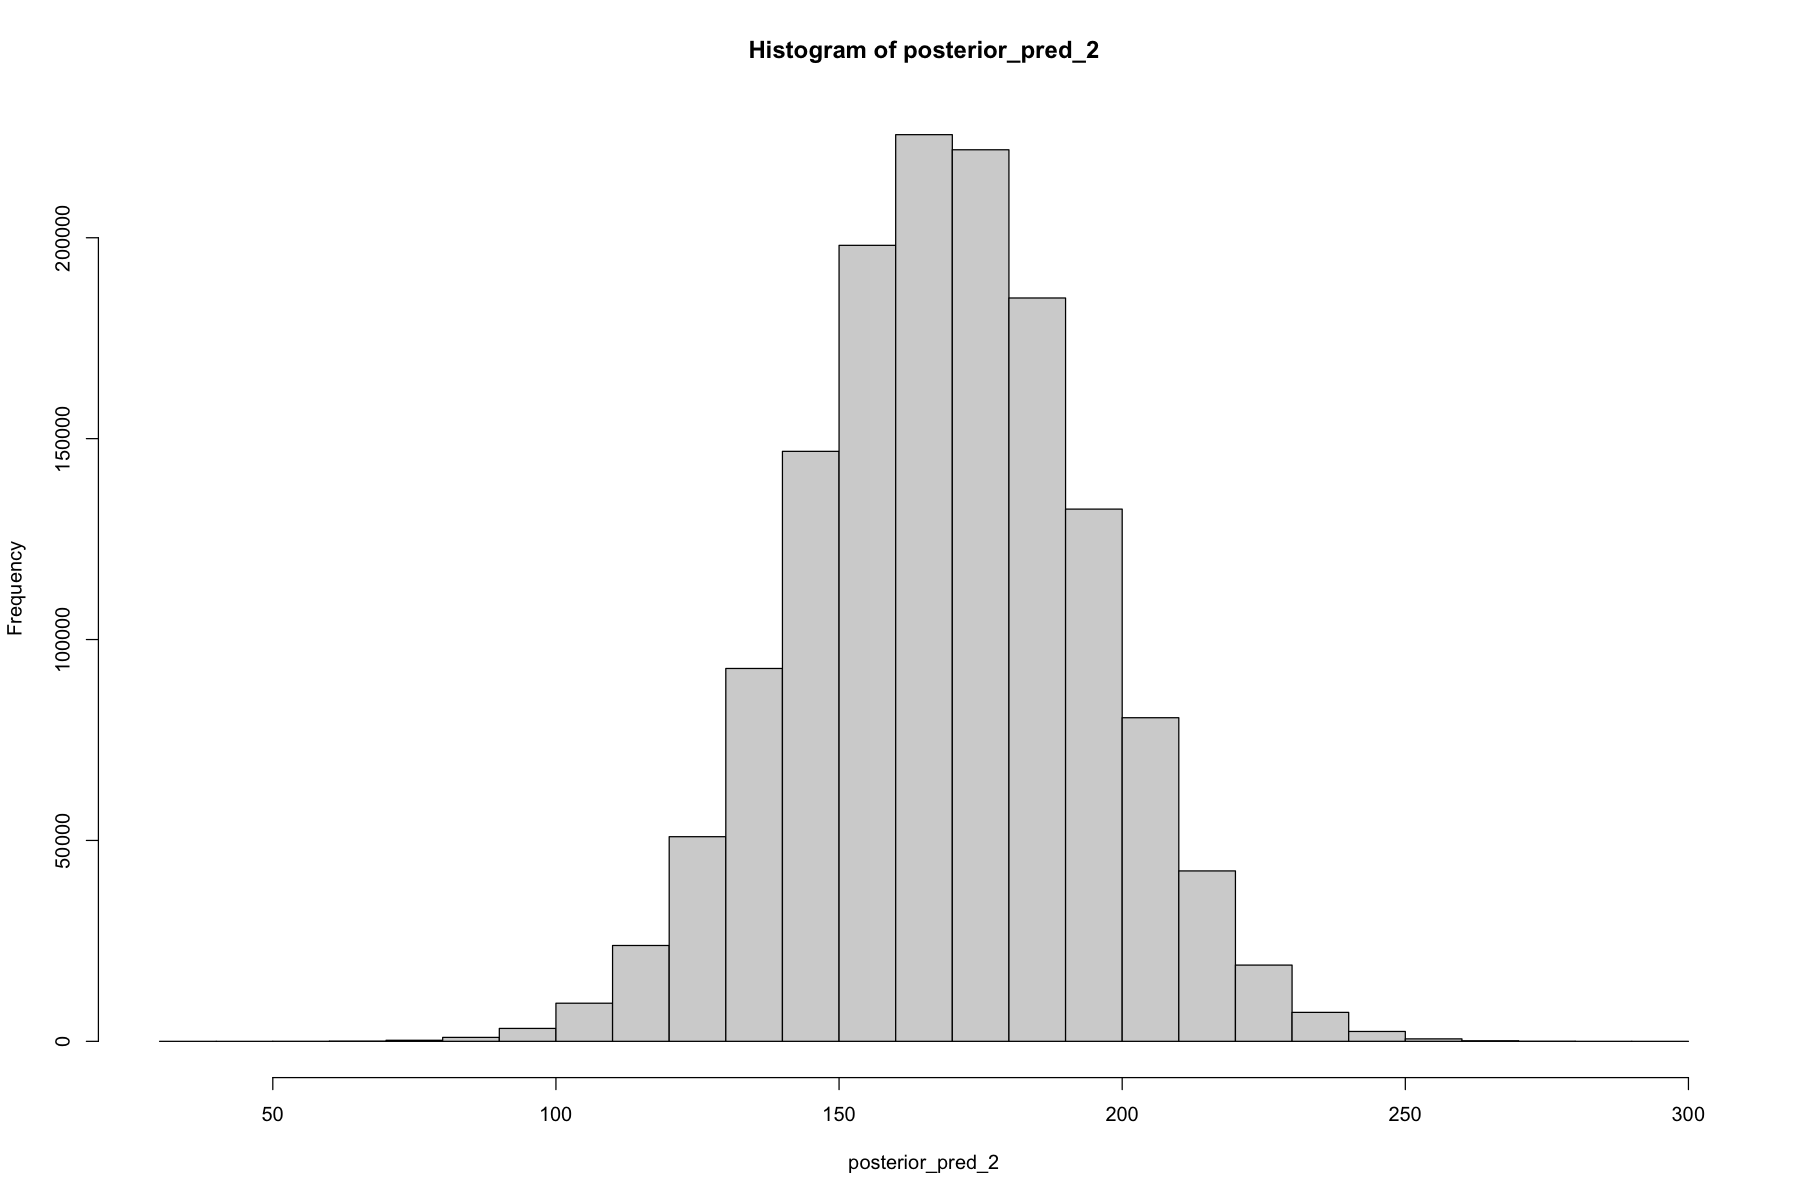

In [41]:
hist(posterior_pred_2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



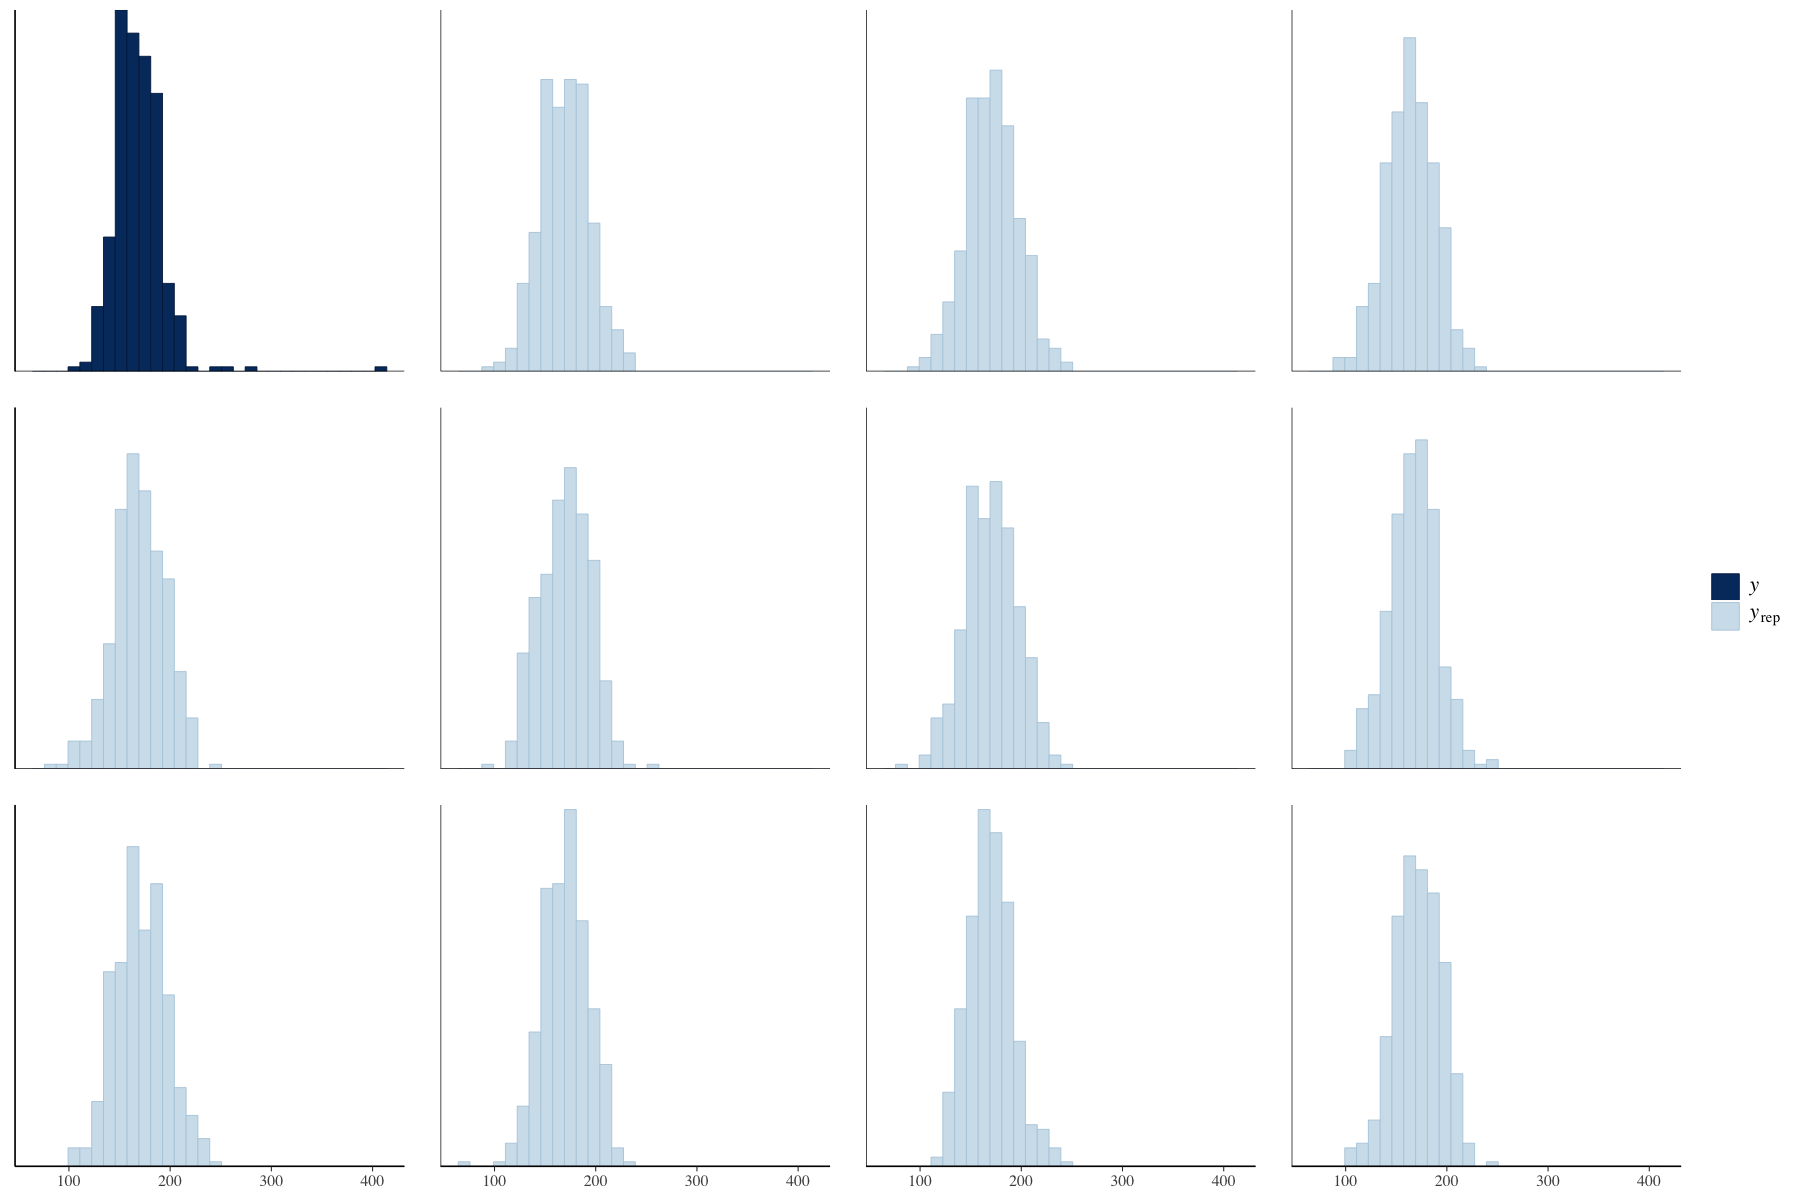

In [42]:
pp_check(fit_press, ndraws = 11, type = "hist")

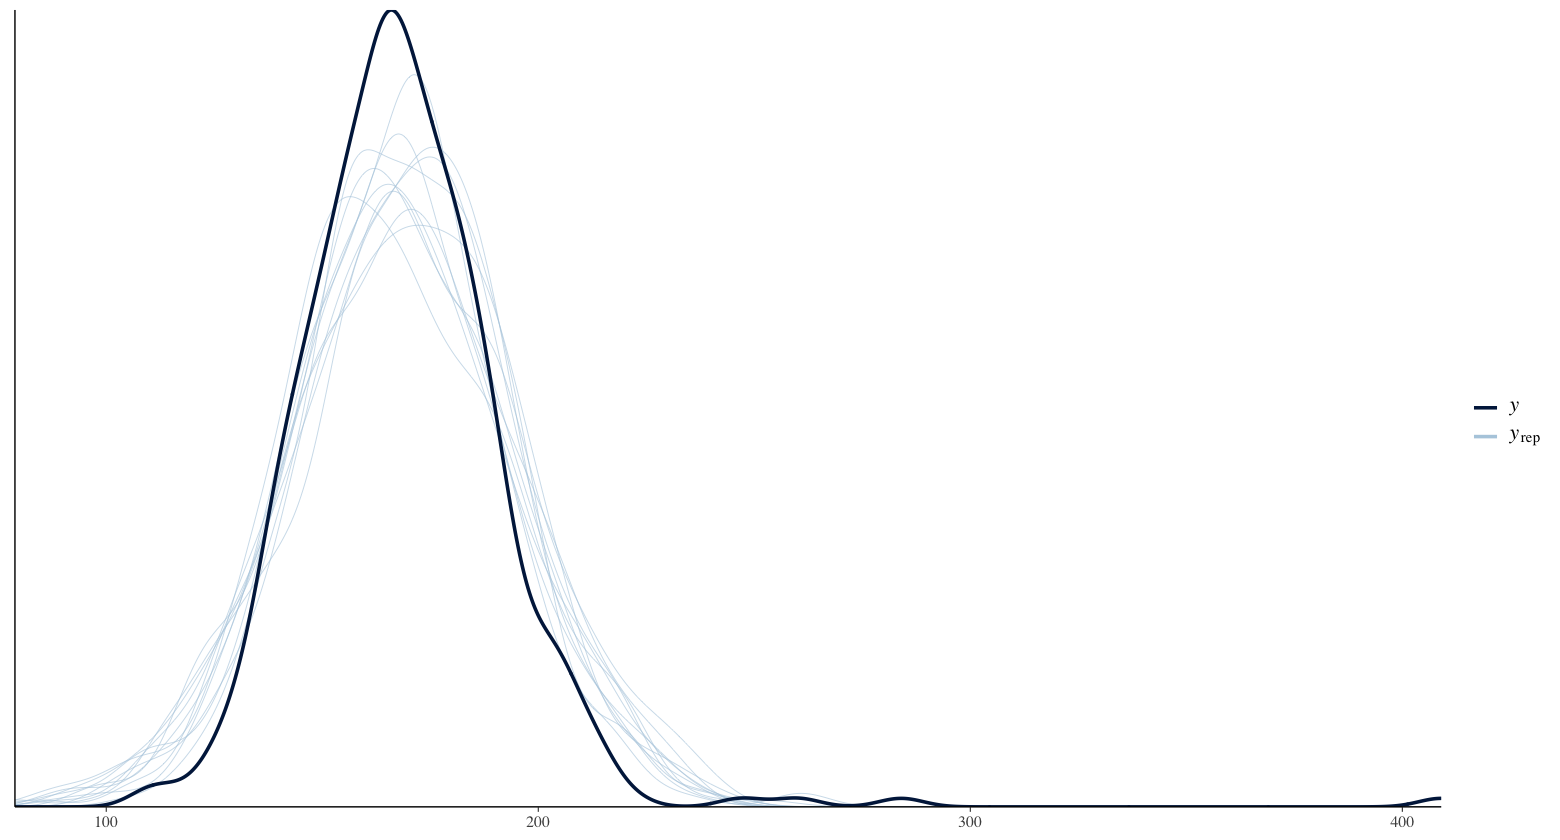

In [46]:
options(repr.plot.width=13, repr.plot.height=7)
pp_check(fit_press, ndraws = 11, type = "dens_overlay")

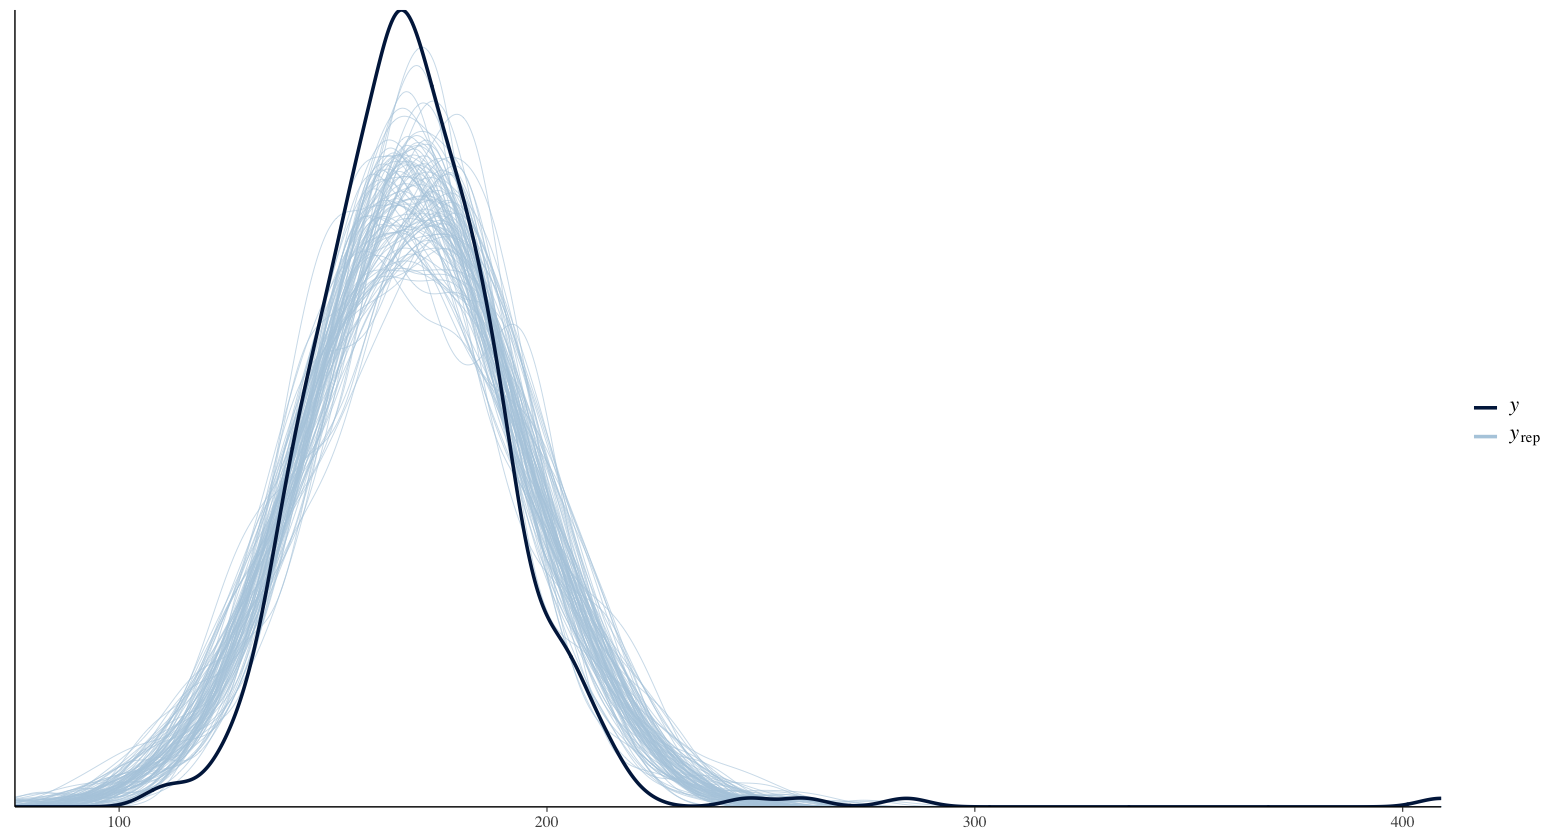

In [47]:
pp_check(fit_press, ndraws = 100, type = "dens_overlay")

### Different likelihoods - log-normal likelihood

If y is log-normally distributed, this means that log(y) is normally distributed.

Because RT cannot be negative, we could model distribution of RTs as log-normal than normal

#### Re-fitting a single subject pressing a button repeatedly with a log-normal likelihood

In [48]:
# drawing samples from log-normal prior predictive distribution 

N_samples <- 1000
N_obs <- nrow(df_spacebar)
mu_samples <- runif(N_samples, 0, 11)
sigma_samples <- runif(N_samples, 0, 1)

prior_pred_ln <- normal_predictive_distribution(
  mu_samples = mu_samples,
  sigma_samples = sigma_samples,
  N_obs = N_obs
) %>%
  mutate(rt_pred = exp(rt_pred))

In [ ]:
prior_pred %>% 
    ggplot(aes(rt_pred)) +
    theme_bw() +
    geom_histogram(aes(y=..density..), color="white", fill="grey")

In [ ]:
prior_pred_ln

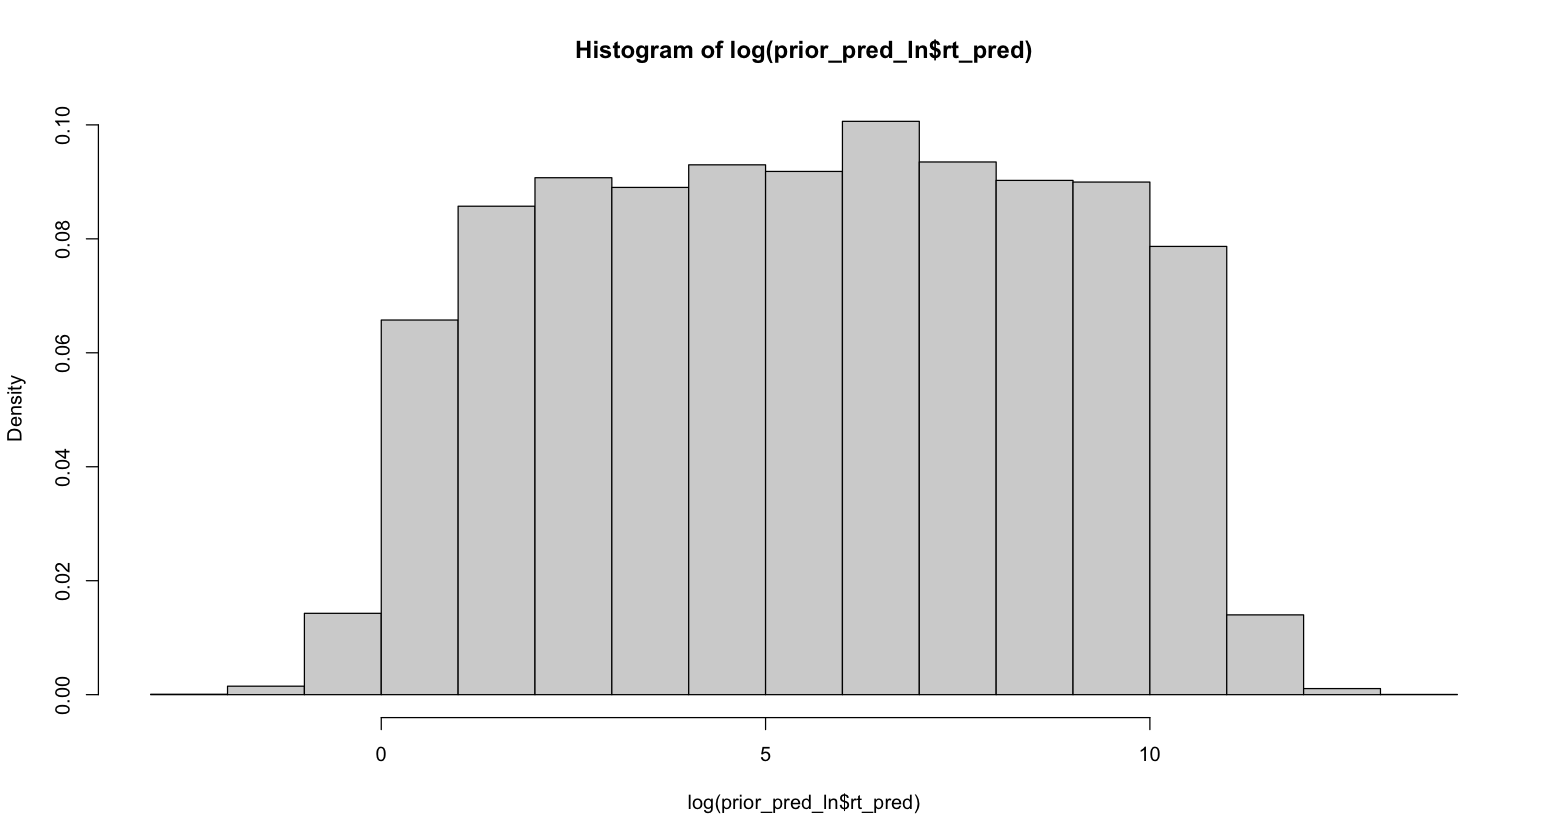

In [84]:
hist(log(prior_pred_ln$rt_pred), prob=TRUE)

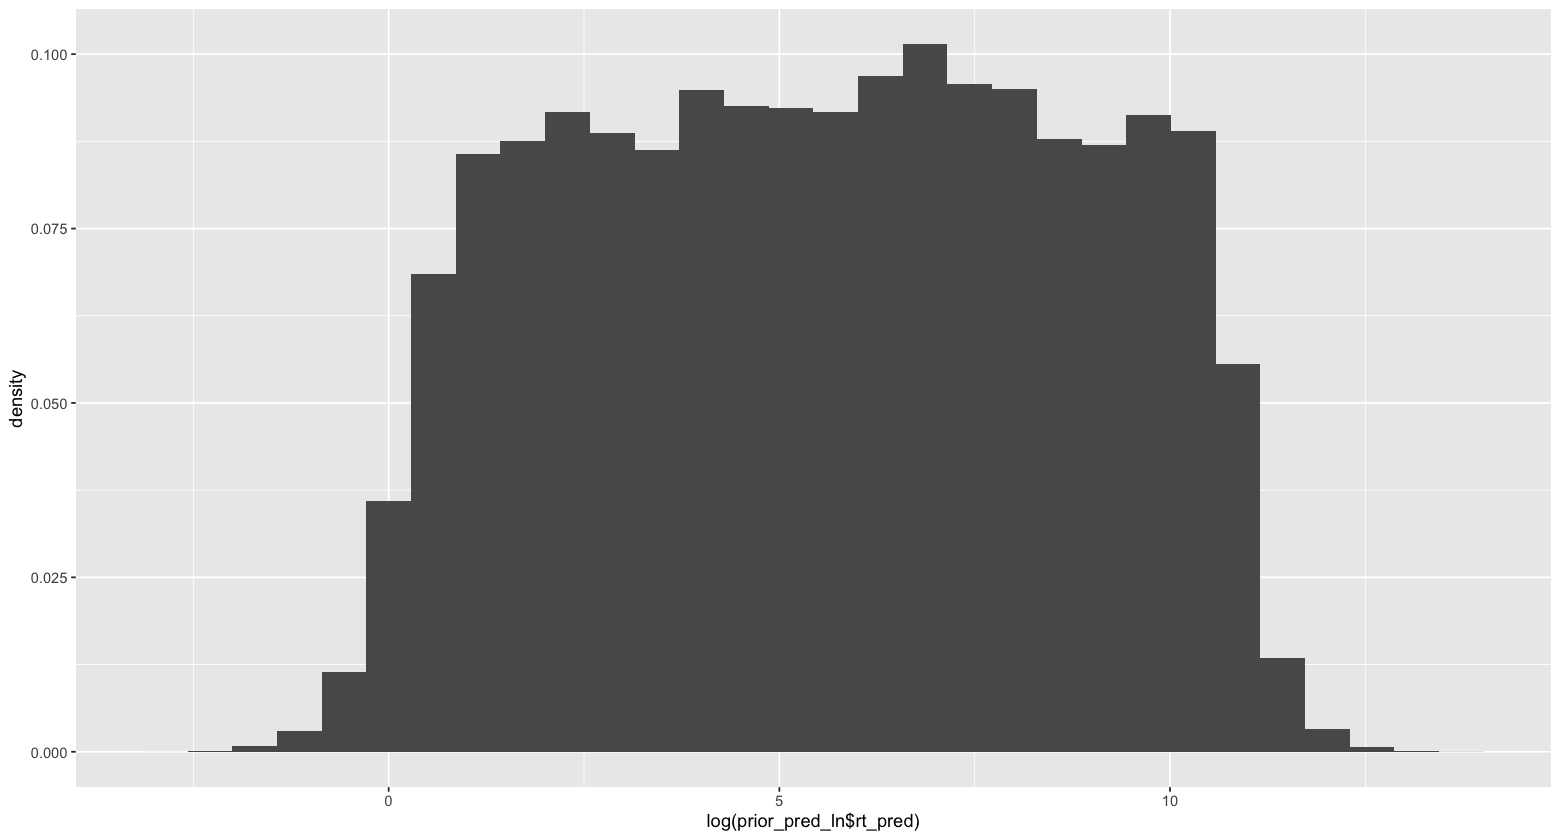

In [80]:
ggplot(data.frame(log(prior_pred_ln$rt_pred)), aes(log(prior_pred_ln$rt_pred))) + 
geom_histogram(aes(y=..density..), bins = 30)

In [90]:
mean(prior_pred_ln$rt_pred)

[1] 6241.748

In [89]:
c(
  lower = exp(6 - 2 * 1.5),
  higher = exp(6 + 2 * 1.5)
)

lower     higher 
  20.08554 8103.08393

In [6]:
df_spacebar_ref <- df_spacebar %>%
  mutate(rt = runif(n(), 0, 10000))

In [ ]:
df_spacebar_ref

In [17]:
fit_prior_press_ln <- brm(rt ~ 1,
  data = df_spacebar_ref,
  family = lognormal(),
  prior = c(
    prior(normal(6, 1.5), class = Intercept),
    prior(normal(0, 1), class = sigma)
  ),
  sample_prior = "only",
)

Compiling Stan program...

Start sampling

Warning message:
“There were 4 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [18]:
fit_prior_press_ln

Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: lognormal 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar_ref (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     6.00      1.51     3.05     8.93 1.00     1783     1896

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.76      0.60     0.03     2.18 1.00     1177     1012

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Using all posterior draws for ppc type 'stat' by default.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



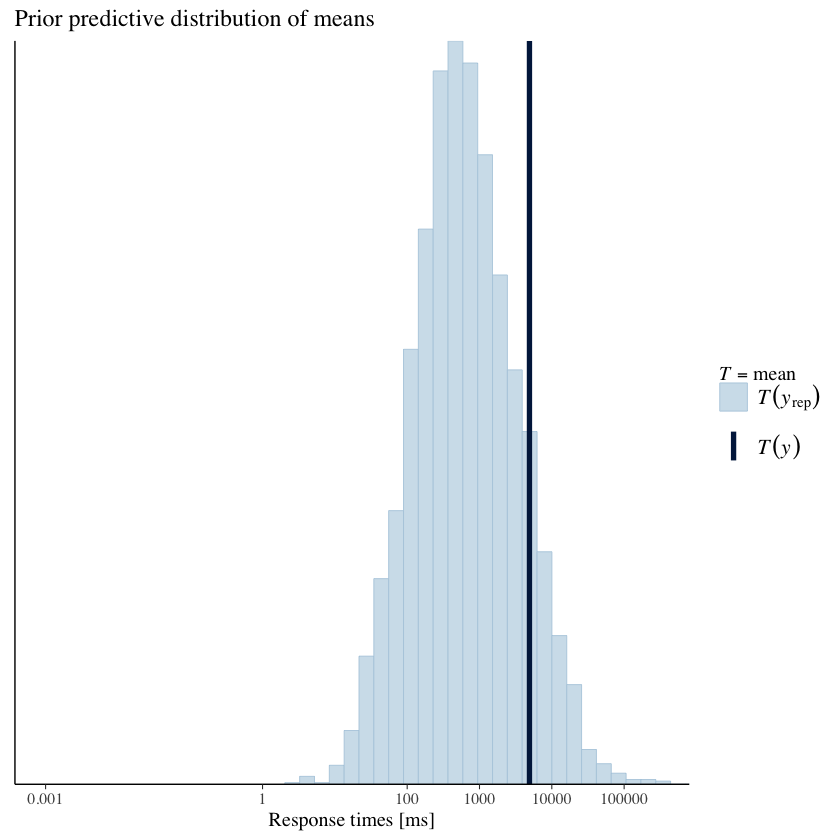

In [19]:
pp_check(fit_prior_press_ln, type = "stat", stat = "mean") +
  coord_cartesian(xlim = c(0.001, 300000)) +
  scale_x_continuous("Response times [ms]",
    trans = "log",
    breaks = c(0.001, 1, 100, 1000, 10000, 100000),
    labels = c(
      "0.001", "1", "100", "1000", "10000",
      "100000"
    )
  ) +
  ggtitle("Prior predictive distribution of means")

In [7]:
fit_press_ln <- brm(rt ~ 1,
  data = df_spacebar,
  family = lognormal(),
  prior = c(
    prior(normal(6, 1.5), class = Intercept),
    prior(normal(0, 1), class = sigma)
  )
)

Compiling Stan program...

Start sampling



In [23]:
fit_press_ln

 Family: lognormal 
  Links: mu = identity; sigma = identity 
Formula: rt ~ 1 
   Data: df_spacebar (Number of observations: 361) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     5.12      0.01     5.10     5.13 1.00     4071     2751

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.13      0.01     0.13     0.15 1.00     3501     2563

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [22]:
pp_check(fit_press_ln, ndraws = 100)

ERROR: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title

In [ ]:
pp_check(fit_prior_press_ln, type = "stat", stat = "mean") +
  coord_cartesian(xlim = c(0.001, 300000)) +
  scale_x_continuous("Response times [ms]",
    trans = "log",
    breaks = c(0.001, 1, 100, 1000, 10000, 100000),
    labels = c(
      "0.001", "1", "100", "1000", "10000",
      "100000"
    )
  ) +
  ggtitle("Prior predictive distribution of means")

In [20]:
estimate_ms <- exp(as_draws_df(fit_press_ln)$b_Intercept)

In [21]:
c(mean = mean(estimate_ms), quantile(estimate_ms, probs = c(.025, .975)))

mean     2.5%    97.5% 
167.0373 164.7895 169.3016